<a href="https://colab.research.google.com/github/roshan-koirala/ceri8211globalgeophysics/blob/master/Roshan_HW4_Q4_d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modules**

In [0]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

**Creating grid of Latitude and Longitude**

In [0]:
phi = np.linspace(0, 2*np.pi, 361,  endpoint=False)    # Longitude
theta = np.linspace(0, np.pi, 181,  endpoint=False)  # Co-Latitude
phi, theta = np.meshgrid(phi, theta)  # Grid of Co-Latitude and Longitude

**Gauss Coefficients (IGRF - 2015)**

In [0]:
# Gauss coefficient format - gnm and hnm, first number after g or h is 'n' and second is 'm'
# Coefficient unit is nT
g10   =   -29442
g11   =   -1501
g20   =   -2445.1
g21   =    3012.9
g22   =    1676.7
h11   =    4797.1
h21   =   -2845.6
h22   =   -641.9

**Function for using Legendre Polynomial**

In [0]:
def lg_poly (n, m, theta):
  '''
  Calculates the Legendre polynomial using input (n, m, theta)
  Input:
        - n      = degree
        - m      = order
        - theta  = Colatitude  
  '''
  if (n == 0 and m == 0):
      return 1
  elif (n == 1 and m == 0):
      return np.cos(theta)
  elif (n == 1 and m == 1):
      return np.sin(theta)
  elif (n == 2 and m == 0):
      return ((3/2) * (np.cos(theta))**2) - (1/2)
  elif (n == 2 and m == 1):
      return np.sqrt(3) * (np.sin(theta)) * (np.cos(theta))
  elif (n == 2 and m == 2):
      return ((np.sqrt(3)/2) * (np.sin(theta))**2)


**Geomagnetic Potential Equation**

In [0]:
# Radius of earth in m
R = 6371000

# Expanded form of Geomagnetic Potential Equation (Lowrie, equation 5.34)
# As we have dipole and quadrupole Components, 
# For Dipole, n = 1, and m = 0, 1
# For Quadrupole, n = 2, and m = 0, 1, 2
# The term (R/r) can be eliminated as for the surface, R = r, so it becomes 1

W = R * ( (g10 * lg_poly(1,0,theta)) \
         + ((g11 * np.cos(phi)) + (h11 * np.sin(phi))) * lg_poly(1,1,theta) \
         + (g20 * lg_poly(2,0,theta)) \
         + ((g21 * np.cos(phi)) + (h21 * np.sin(phi))) * lg_poly(2,1,theta) \
         + ((g22 * np.cos(2*phi)) + (h22 * np.sin(2*phi))) * lg_poly(2,2,theta) )

**Polar to Cartesian Coordinates**

In [0]:
x = R * np.sin(theta) * np.cos(phi)
y = R * np.sin(theta) * np.sin(phi)
z = R * np.cos(theta)

**IGRF WMM-2015 Model - 2D Plot**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


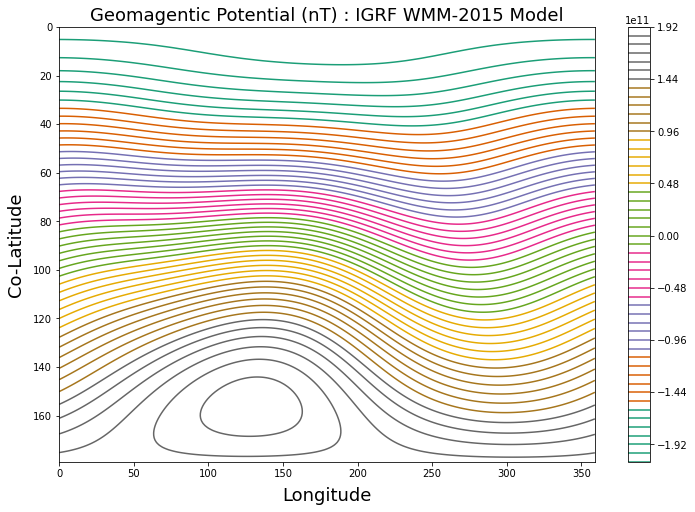

In [0]:
fig = plt.figure(figsize=(12,8))
plt.title('Geomagentic Potential (nT) : IGRF WMM-2015 Model', fontsize=18)
ax = fig.add_subplot(111)
colat = theta  * 180/np.pi
lon = phi * 180/np.pi
con = plt.contour(lon,  colat, W, 50, cmap='Dark2')
#ax.clabel(con, con.levels[::5], inline=True, fontsize=10)
plt.colorbar()
plt.gca().invert_yaxis()
ax.set_xlabel('Longitude', fontsize=18)
ax.set_ylabel('Co-Latitude', fontsize=18)
ax.xaxis.labelpad = 8
ax.yaxis.labelpad = 8
plt.show()

**IGRF WMM-2015 Model - Spherical Plot**

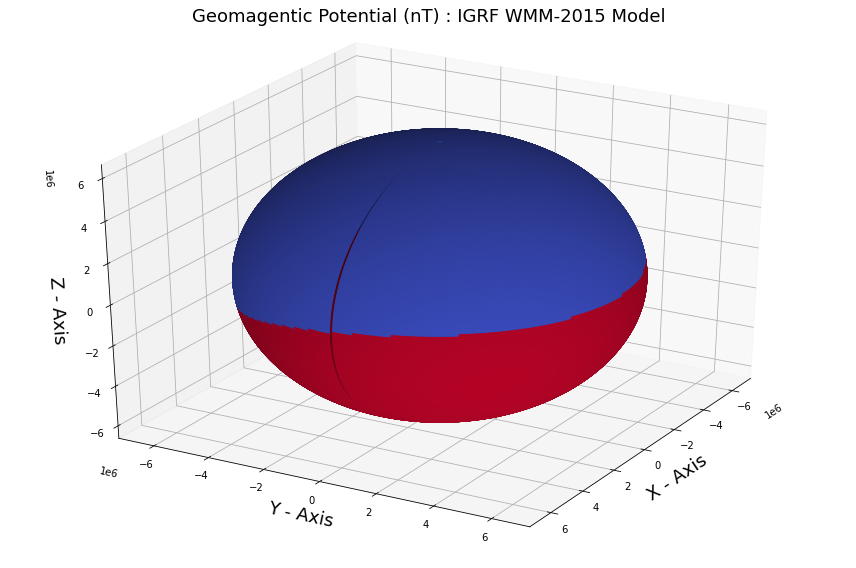

In [0]:
# Set the aspect ratio to 1 so our sphere looks spherical
fig2 = plt.figure(figsize=(12,8))
plt.figaspect(1.)

fig2.suptitle('Geomagentic Potential (nT) : IGRF WMM-2015 Model', fontsize=18)
ax1 = fig2.add_subplot(111, projection='3d')
surf = ax1.plot_surface(x, y, z, facecolors=cm.coolwarm(W), rstride=1, cstride=1)
ax1.view_init(30, 30)
plt.tight_layout()
ax1.set_xlabel('X - Axis', fontsize=18)
ax1.set_ylabel('Y - Axis', fontsize=18)
ax1.set_zlabel('Z - Axis', fontsize=18)
ax1.xaxis.labelpad = 8
ax1.yaxis.labelpad = 8
ax1.zaxis.labelpad = 8
plt.show()

In [0]:
W_2015 = W[0:,1]
#W_2015

**Comparing the plots for 2005 and 2015, there is no much visual differences. However, the values of magnetic Potential for each position slightly changes while comparing them numerically.**